# Assignment 24


### Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.


In [1]:
import numpy as np
import pandas as pd

### Load and prep the data

In [60]:
# Loading the data into the dataframe
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)   

In [61]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [64]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that 'Age' and 'Cabin' includes null values. 
Since we dont need column 'Cabin' for prediction, we will try to remove null valuesfrom the column 'Age' by replacing all zeroes with 
median values.

In [65]:
# Median of age gender wise
titanic.groupby('Sex').Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [66]:
# Replace null values of age with median age of gender
age_sex_median = titanic.groupby('Sex').Age.transform('median')
titanic.Age.fillna(age_sex_median, inplace=True)

In [67]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 We can check that column 'Age' has no more null values

In [73]:
class_sex_grouping = titanic.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  33.882979  0.553191  0.457447   
       male     455.729508  0.368852  39.167377  0.311475  0.278689   
2      female   443.105263  0.921053  28.677632  0.486842  0.605263   
       male     447.962963  0.157407  30.595648  0.342593  0.222222   
3      female   399.729167  0.500000  23.281250  0.895833  0.798611   
       male     455.515850  0.135447  27.182767  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

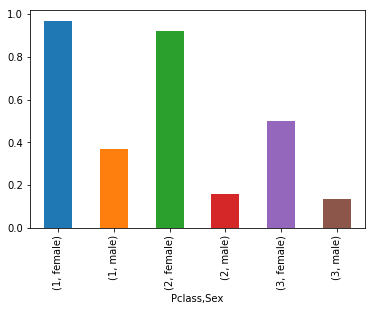

In [81]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

class_sex_grouping['Survived'].plot.bar()
plt.show()

In each class females have a higher chance of survivor

In [72]:
# Selecting categorical columns to feature engineer
cat_cols = titanic.select_dtypes(include='object').columns.values
cat_cols

array(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype=object)

We can see all the categorical columns since we will be using 'Sex' for our analysis we will convert it to numerical. 

In [92]:
# Encoding the Sex columns values into 0 and 1 and creating a new column with those values
titanic['Sex_new'] = titanic['Sex'].replace({'female':0, 'male': 1})

In [93]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [94]:
# Dropping the Sex column
titanic.drop("Sex",axis =1, inplace = True)

In [95]:
titanic.drop(axis =1, columns= ["PassengerId","Name","Ticket","Cabin","Embarked"], inplace = True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_new
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [96]:
# select features
y = titanic['Survived']
X = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_new']]

In [97]:
from sklearn.model_selection import train_test_split

# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Train the model and make predictions

Note we didn't have to standardize the data to use a decision tree.

In [98]:
from sklearn.tree import DecisionTreeClassifier

# train the decision tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [99]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

### Evaluate the model's performance

Including the tree's axis-parallel decision boundaries and how the tree splits

In [100]:
from sklearn.metrics import accuracy_score

# how did our model perform?

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 55
Accuracy: 0.79



### Evaluate the model's performance

Including the tree's axis-parallel decision boundaries and how the tree splits


In [101]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, dtree.predict(X_train))

array([[348,  33],
       [ 38, 204]], dtype=int64)

In [102]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TP = conf_mat[1][1]

print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("True Positive :",TP)

[[139  29]
 [ 26  74]]
True Negative : 139
False Positive : 29
False Negative : 26
True Positive : 74


In [103]:
# how did my model perform?

Error = (FP + FN)/(TN+FP+FN+TP)
print('Classification Error: {:.2f}'.format(Error))

Accuracy = (TP + TN)/(TN+FP+FN+TP)
print("Accuracy : {:.2f}".format(Accuracy))

# Out of actual survived, how much is predicted as survived?
Sensitivity = TP/(FN+TP)
print("Sensitivity/Recall/True Positive Rate: {:.2f}".format(Sensitivity))

# Out of actual not survived, how much is predicted as not survived?
Specifity = TN/(FP+TN)
print("Specifity : {:.2f}".format(Specifity))

# when the actual not survived, how much is predicted as survived?
FPR = FP/(TN+FP)
print("False Positive Rate : {:.2f}".format(FPR))

# when the predicted value is survived, how much prediction is correct?
Precision_1 = TP/(FP+TP)
print("Precision for 1: {:.2f}".format(Precision_1))

# when the predicted value is not survived, how much prediction is correct?
Precision_0 = TN/(FN+TN)
print("Precision for 0 : {:.2f}".format(Precision_0))

Classification Error: 0.21
Accuracy : 0.79
Sensitivity/Recall/True Positive Rate: 0.74
Specifity : 0.83
False Positive Rate : 0.17
Precision for 1: 0.72
Precision for 0 : 0.84


The F1-score reveals weighted average between precision and recall which means if the value approaches 1, it's infered as a good score.

In [104]:
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.84      0.83      0.83       168
          1       0.72      0.74      0.73       100

avg / total       0.80      0.79      0.80       268



### Null accuracy: Accuracy that could be achieved by always predicting the most accurate class

In [105]:
# Examine the class distribution of the testing set
y_test.value_counts()

0    168
1    100
Name: Survived, dtype: int64

In [106]:
# Calculate the percentage of Ones
y_test.mean()

0.373134328358209

In [107]:
# Calculate the percentage of Zeros
1-y_test.mean()

0.6268656716417911

In [108]:
# Calculate the null accuracy which suggets passenger died is correct 62% of the time
max(y_test.mean(),1-y_test.mean())

0.6268656716417911

In [109]:
# Calculate the null accuracy (for multi class classification problem)
y_test.value_counts().head(1)/len(y_test)

0    0.626866
Name: Survived, dtype: float64

### Validation and Cross Validation

In [110]:
from sklearn.cross_validation import KFold

cv = KFold(n=len(X),  # Number of elements
           n_folds=10,            # Desired number of cv folds
           random_state=12) 

In [111]:
fold_accuracy = []

# titanic_train["Sex"] = encoded_sex

for train_fold, valid_fold in cv:
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = dtree.fit(X = train, 
                           y = train_y)
    valid_acc = model.score(X = valid, 
                            y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.7444444444444445, 0.8876404494382022, 0.7528089887640449, 0.8651685393258427, 0.8539325842696629, 0.8314606741573034, 0.7752808988764045, 0.7640449438202247, 0.8539325842696629, 0.8539325842696629] 

Average accuracy:  0.8182646691635457


Model accuracy can vary significantly from one fold to the next, especially with small data sets, but the average accuracy across the folds gives you an idea of how the model might perform on unseen data. As with holdout validation, we'd like the target variable's classes to have roughly the same proportion across each fold when performing cross validation for a classification problem. To perform stratified cross validation, use the StratifiedKFold() function instead of KFold(). You use can score a model with stratified cross validation with a single function call with the cross_val_score() function:

In [112]:
from sklearn.cross_validation import cross_val_score

In [113]:
scores = cross_val_score(estimator= dtree,                    # Model to test
                          X= X,  
                          y = y,                              # Target variable
                        scoring = "accuracy",                 # Scoring metric    
                         cv = 10)                             # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.74444444 0.86666667 0.7752809  0.88764045 0.8988764  0.79775281
 0.80898876 0.7752809  0.83146067 0.85227273]
Average accuracy:  0.8238664737260242


### We got average accuracy of 82% by using KFold validtion method. While by train_test_split method gives accuracy of 79%. Lets predict 


In [126]:
test_data = X_test
test_data

,Pclass,Age,SibSp,Parch,Fare,Sex_new,Survived
495,3,29.00,0,0,14.4583,1,0
648,3,29.00,0,0,7.5500,1,0
278,3,7.00,4,1,29.1250,1,0
31,1,27.00,1,0,146.5208,0,1
255,3,29.00,0,2,15.2458,0,0
298,1,29.00,0,0,30.5000,1,0
609,1,40.00,0,0,153.4625,0,1
318,1,31.00,0,2,164.8667,0,1
484,1,25.00,1,0,91.0792,1,0
367,3,27.00,0,0,7.2292,0,1
